# Network Intrusion Detection Using Machine Learning/Deep Learning
This notebook involves the making of machine learning & deep learning models to classify the given data of obtained as a network intrusion into differen classes (malignant or benign). 

# Importing Libraries
First, we will import libraries that we need to start our workflow. The libraries we are using are:
* NumPy
* Pandas
* Matplotlib
* Scikit-learn
* Keras
* TensorFlow

In [4]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, re, time, math, tqdm, itertools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import keras
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint

In [5]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense,Dropout,LSTM,Embedding,SimpleRNN, GRU,Activation,Flatten
from tensorflow.keras.layers import Conv1D,MaxPool1D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,CSVLogger
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import sequence
from sklearn.metrics import (precision_score, recall_score,confusion_matrix,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
import pandas as pd
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
import matplotlib.pyplot as plt


In [6]:
df1 = pd.read_csv("../Data/02-14-2018.csv")
df2 = pd.read_csv("../Data/02-15-2018.csv")
df5 = pd.read_csv("../Data/02-21-2018.csv")
df6 = pd.read_csv("../Data/02-22-2018.csv")
df7 = pd.read_csv("../Data/02-23-2018.csv")
df10 = pd.read_csv("../Data/03-02-2018.csv")

We have a lot of data available to deal with in this notebook. We will perform analysis, preprocessing and modeling on one of the datasets and will conclude the results at the end.

# Loading the Data
First step is to load the available data into our memory.

In [5]:
# network_data=df1

In [7]:
%%time
# load the data into memory
merge = [
    df1, 
    df2,
    df5,
    df6, 
    df7, 
    df10]
network_data = pd.concat(merge)
del merge
network_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6291450 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           int64  
 1   Protocol           int64  
 2   Timestamp          object 
 3   Flow Duration      int64  
 4   Tot Fwd Pkts       int64  
 5   Tot Bwd Pkts       int64  
 6   TotLen Fwd Pkts    int64  
 7   TotLen Bwd Pkts    float64
 8   Fwd Pkt Len Max    int64  
 9   Fwd Pkt Len Min    int64  
 10  Fwd Pkt Len Mean   float64
 11  Fwd Pkt Len Std    float64
 12  Bwd Pkt Len Max    int64  
 13  Bwd Pkt Len Min    int64  
 14  Bwd Pkt Len Mean   float64
 15  Bwd Pkt Len Std    float64
 16  Flow Byts/s        float64
 17  Flow Pkts/s        float64
 18  Flow IAT Mean      float64
 19  Flow IAT Std       float64
 20  Flow IAT Max       float64
 21  Flow IAT Min       float64
 22  Fwd IAT Tot        float64
 23  Fwd IAT Mean       float64
 24  Fwd IAT Std        float64
 25  Fwd IAT Max       

# EDA (Exploratory Data Analysis)
For making a proper undertanding of dataset we are using, we will perform a bief EDA (Exploratory Data Analysis). The EDA is sub-divided into:
* Data Visuals
* Data Understanding
* Data Analysis

In [5]:
# check the shape of data
network_data.shape

(6291450, 80)

In [7]:
# check the number of rows and columns
print('Number of Rows (Samples): %s' % str((network_data.shape[0])))
print('Number of Columns (Features): %s' % str((network_data.shape[1])))

Number of Rows (Samples): 6291450
Number of Columns (Features): 80


We have a total of **1 million+** samples and **80** features in data.

In [8]:
network_data.head(4)

Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0         0         0  14/02/2018 08:31:01      112641719             3   
1         0         0  14/02/2018 08:33:50      112641466             3   
2         0         0  14/02/2018 08:36:39      112638623             3   
3        22         6  14/02/2018 08:40:13        6453966            15   

   Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0             0                0              0.0                0   
1             0                0              0.0                0   
2             0                0              0.0                0   
3            10             1239           2273.0              744   

   Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0                0  ...                 0          0.0         0.0   
1                0  ...                 0          0.0         0.0   
2                0  ...                 0          0.0         0.0   
3                0  ...                32          0.0         0.0   

   Active Max  Active Min   Idle Mean    Idle Std    Idle Max    Idle Min  \
0         0.0         0.0  56320859.5  139.300036  56320958.0  56320761.0   
1         0.0         0.0  56320733.0  114.551299  56320814.0  56320652.0   
2         0.0         0.0  56319311.5  301.934596  56319525.0  56319098.0   
3         0.0         0.0         0.0    0.000000         0.0         0.0   

    Label  
0  Benign  
1  Benign  
2  Benign  
3  Benign  

[4 rows x 80 columns]

In [7]:
# check the columns in data
network_data.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [8]:
# check the number of columns
print('Total columns in our data: %s' % str(len(network_data.columns)))

Total columns in our data: 80


The dataset is huge. We have a total of **80** columns in our data.

In [9]:
network_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6291450 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           int64  
 1   Protocol           int64  
 2   Timestamp          object 
 3   Flow Duration      int64  
 4   Tot Fwd Pkts       int64  
 5   Tot Bwd Pkts       int64  
 6   TotLen Fwd Pkts    int64  
 7   TotLen Bwd Pkts    float64
 8   Fwd Pkt Len Max    int64  
 9   Fwd Pkt Len Min    int64  
 10  Fwd Pkt Len Mean   float64
 11  Fwd Pkt Len Std    float64
 12  Bwd Pkt Len Max    int64  
 13  Bwd Pkt Len Min    int64  
 14  Bwd Pkt Len Mean   float64
 15  Bwd Pkt Len Std    float64
 16  Flow Byts/s        float64
 17  Flow Pkts/s        float64
 18  Flow IAT Mean      float64
 19  Flow IAT Std       float64
 20  Flow IAT Max       float64
 21  Flow IAT Min       float64
 22  Fwd IAT Tot        float64
 23  Fwd IAT Mean       float64
 24  Fwd IAT Std        float64
 25  Fwd IAT Max       

In [6]:
network_data.describe()

Dst Port      Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
count  1.048575e+06  1.048575e+06   1.048575e+06  1.048575e+06  1.048575e+06   
mean   4.876262e+03  8.107557e+00   6.255555e+06  6.206622e+00  7.211191e+00   
std    1.444344e+04  4.460625e+00   1.260291e+09  4.447851e+01  1.048682e+02   
min    0.000000e+00  0.000000e+00  -9.190110e+11  1.000000e+00  0.000000e+00   
25%    2.200000e+01  6.000000e+00   7.000000e+00  1.000000e+00  1.000000e+00   
50%    5.300000e+01  6.000000e+00   1.023000e+03  2.000000e+00  1.000000e+00   
75%    4.430000e+02  6.000000e+00   4.066690e+05  7.000000e+00  6.000000e+00   
max    6.553300e+04  1.700000e+01   1.200000e+08  5.115000e+03  9.198000e+03   

       TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
count     1.048575e+06     1.048575e+06     1.048575e+06     1.048575e+06   
mean      4.479936e+02     4.521803e+03     1.745736e+02     8.389535e+00   
std       1.573541e+04     1.515021e+05     2.876713e+02     1.948279e+01   
min       0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00   
25%       0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00   
50%       3.600000e+01     5.500000e+01     3.400000e+01     0.000000e+00   
75%       4.550000e+02     7.680000e+02     1.990000e+02     0.000000e+00   
max       8.591554e+06     1.339773e+07     6.444000e+04     1.460000e+03   

       Fwd Pkt Len Mean  ...  Fwd Act Data Pkts  Fwd Seg Size Min  \
count      1.048575e+06  ...       1.048575e+06      1.048575e+06   
mean       3.879579e+01  ...       2.793536e+00      2.327970e+01   
std        5.331882e+01  ...       5.557106e+00      1.106185e+01   
min        0.000000e+00  ...       0.000000e+00      0.000000e+00   
25%        0.000000e+00  ...       0.000000e+00      2.000000e+01   
50%        2.566667e+01  ...       0.000000e+00      2.000000e+01   
75%        5.550000e+01  ...       4.000000e+00      3.200000e+01   
max        1.121703e+04  ...       1.031000e+03      4.800000e+01   

        Active Mean    Active Std    Active Max    Active Min     Idle Mean  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   5.152449e+04  2.136151e+04  8.789157e+04  3.995477e+04  3.101206e+06   
std    5.815586e+05  2.186405e+05  7.395725e+05  5.602693e+05  5.414780e+08   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    1.102401e+08  5.723446e+07  1.102401e+08  1.102401e+08  3.394503e+11   

           Idle Std      Idle Max      Idle Min  
count  1.048575e+06  1.048575e+06  1.048575e+06  
mean   7.297218e+05  4.812391e+06  2.126920e+06  
std    3.820031e+08  1.522117e+09  1.817013e+07  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  0.000000e+00  
75%    0.000000e+00  0.000000e+00  0.000000e+00  
max    2.432682e+11  9.797810e+11  1.260300e+10  

[8 rows x 78 columns]

The following information tells us that:
* We have a huge amount of data, containing **1 million+** entries (samples)
* There are a total of **80** columns belinging to each sample
* There are missing values in our data, which need to be filled or dropped for proper modelling
* The memory consumption of data is **700 MB**

In [10]:
# check the number of values for labels
network_data['Label'].value_counts()

Benign                   4883142
DDOS attack-HOIC          686012
Bot                       286191
FTP-BruteForce            193360
SSH-Bruteforce            187589
DoS attacks-GoldenEye      41508
DoS attacks-Slowloris      10990
DDOS attack-LOIC-UDP        1730
Brute Force -Web             611
Brute Force -XSS             230
SQL Injection                 87
Name: Label, dtype: int64

Most of the network intrusions in our data are benign, as output from above code cell. 

## Data Visualizations
After getting some useful information about our data, we now make visuals of our data to see how the trend in our data goes like. The visuals include bar plots, distribution plots, scatter plots, etc.

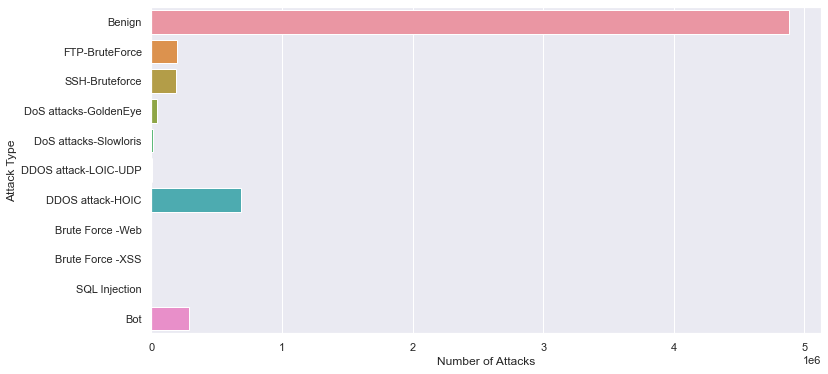

In [11]:
# make a plot number of labels
sns.set(rc={'figure.figsize':(12, 6)})
plt.xlabel('Attack Type')
sns.set_theme()
ax = sns.countplot(y='Label', data=network_data)
ax.set(xlabel='Number of Attacks', ylabel='Attack Type')
plt.show()

<AxesSubplot:>

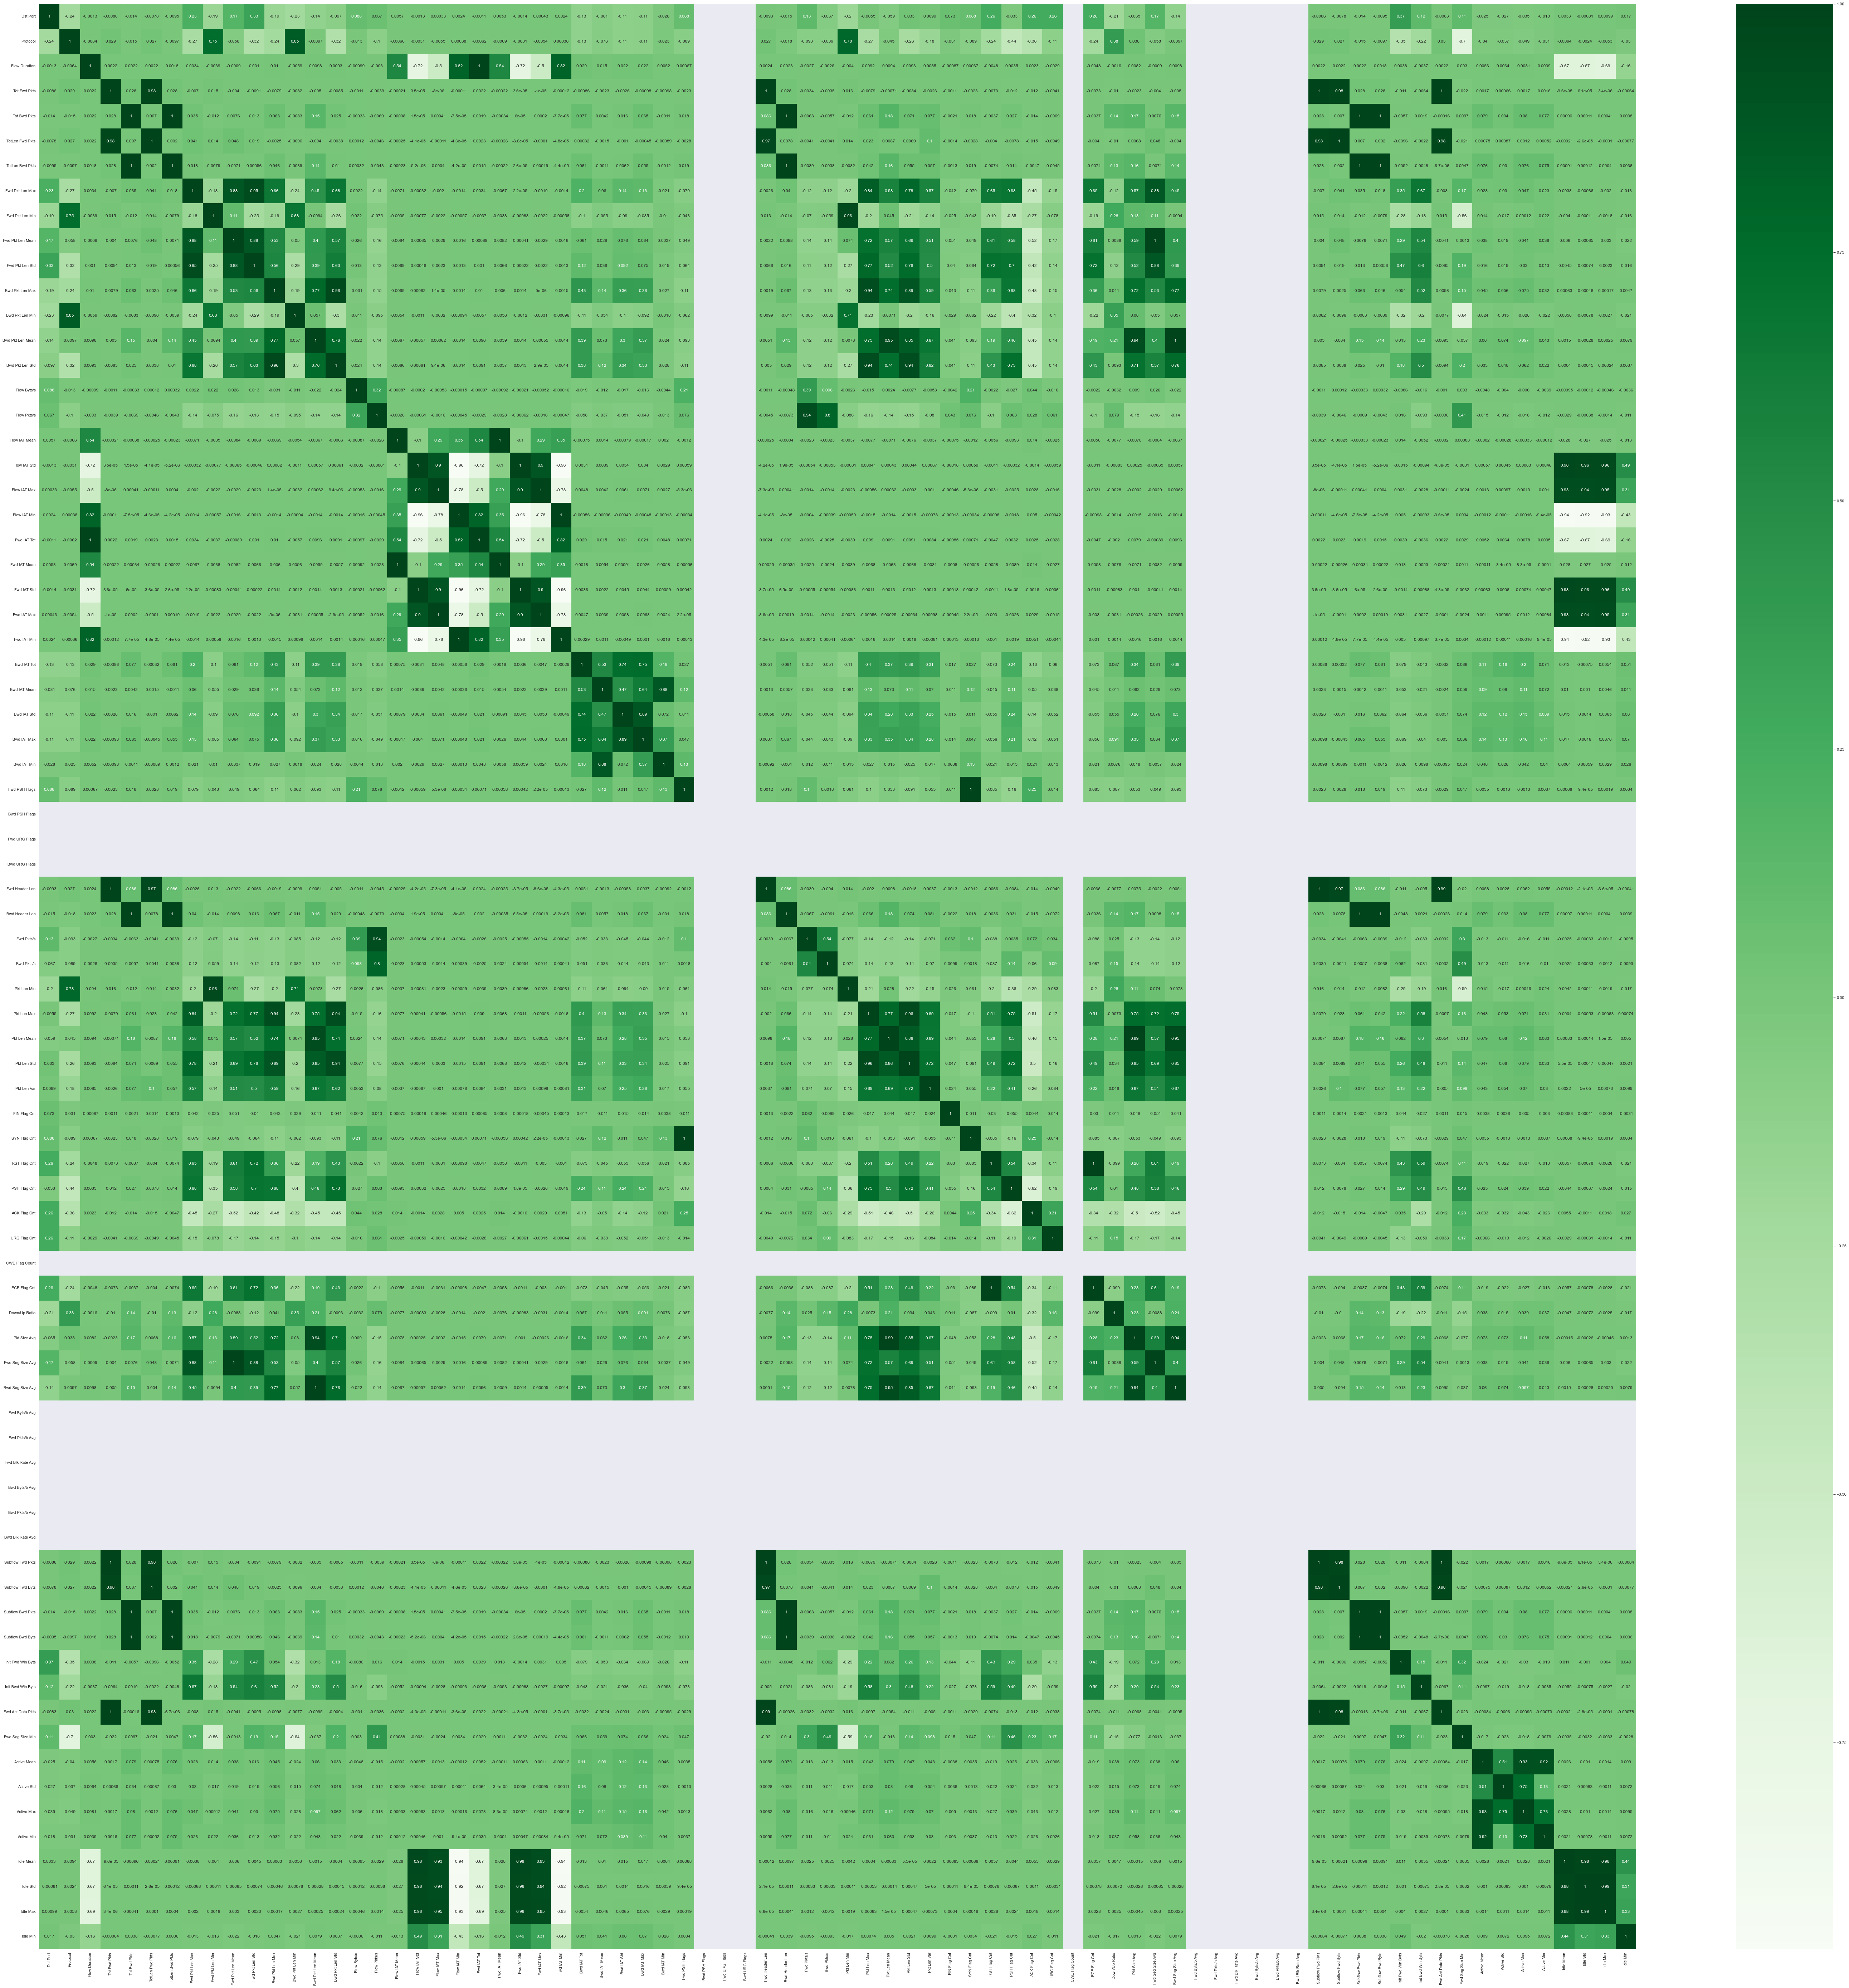

In [19]:
plt.figure(figsize=(100,100))
sns.heatmap(network_data.corr(),cmap='Greens',annot=True)

In [11]:
#make a scatterplot
pyo.init_notebook_mode()
fig = px.scatter(x = network_data["Bwd Pkts/s"][:100000], 
                 y=network_data["Fwd Seg Size Min"][:100000])
fig

In [ ]:
# check the dtype of timestamp column
(network_data['Timestamp'].dtype)

dtype('O')

# Data Preprocessing
Data preprocessing plays an important part in the process of data science, since data may not be fully clean and can contain missing or null values. In this step, we are undergoing some preprocessing steps that will help us if there is any null or missing value in our data. 

In [6]:
# check for some null or missing values in our dataset
network_data.isna().sum().to_numpy()

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0, 17079,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0],
      dtype=int64)

All features in the data have no null or missing values, except one feature that contains **2277** missing values. We need to remove this column from our data, so that our data may get cleaned.

In [8]:
# drop null or missing columns
cleaned_data = network_data.dropna()
cleaned_data.isna().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

After removing the missing valued column in our data, we have now no feature that contains any missing or null value. Data is cleaned now.

### Label Encoding
The Label feature in the data contains 3 labels as **Benign**, **BruteForceFTP** and **BruteForceSSH**. All these are in string format. For our neural network, we need to convert them into numbers so that our NN may understand their representations.

In [9]:
# encode the column labels
label_encoder = LabelEncoder()
cleaned_data['Label']= label_encoder.fit_transform(cleaned_data['Label'])
cleaned_data['Label'].unique()

C:\Users\perei\AppData\Local\Temp\ipykernel_2156\2480667849.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([ 0,  8, 10,  6,  7,  5,  4,  2,  3,  9,  1])

In [28]:
# check for encoded labels
print(cleaned_data['Label'].value_counts())
p=dict(cleaned_data['Label'].value_counts())
print(p)

0     4866069
4      686012
1      286191
8      193354
10     187589
6       41508
7       10990
5        1730
2         611
3         230
9          87
Name: Label, dtype: int64
{0: 4866069, 4: 686012, 1: 286191, 8: 193354, 10: 187589, 6: 41508, 7: 10990, 5: 1730, 2: 611, 3: 230, 9: 87}


In [27]:
network_data['Label'].value_counts()
n=dict(network_data['Label'].value_counts())
print(n)

{'Benign': 4883142, 'DDOS attack-HOIC': 686012, 'Bot': 286191, 'FTP-BruteForce': 193360, 'SSH-Bruteforce': 187589, 'DoS attacks-GoldenEye': 41508, 'DoS attacks-Slowloris': 10990, 'DDOS attack-LOIC-UDP': 1730, 'Brute Force -Web': 611, 'Brute Force -XSS': 230, 'SQL Injection': 87}


In [39]:
d={}
print(p)
print(n)
for i in (zip(p,n)):
    d[i[0]]=i[1]
print(d)



{0: 4866069, 4: 686012, 1: 286191, 8: 193354, 10: 187589, 6: 41508, 7: 10990, 5: 1730, 2: 611, 3: 230, 9: 87}
{'Benign': 4883142, 'DDOS attack-HOIC': 686012, 'Bot': 286191, 'FTP-BruteForce': 193360, 'SSH-Bruteforce': 187589, 'DoS attacks-GoldenEye': 41508, 'DoS attacks-Slowloris': 10990, 'DDOS attack-LOIC-UDP': 1730, 'Brute Force -Web': 611, 'Brute Force -XSS': 230, 'SQL Injection': 87}
{0: 'Benign', 4: 'DDOS attack-HOIC', 1: 'Bot', 8: 'FTP-BruteForce', 10: 'SSH-Bruteforce', 6: 'DoS attacks-GoldenEye', 7: 'DoS attacks-Slowloris', 5: 'DDOS attack-LOIC-UDP', 2: 'Brute Force -Web', 3: 'Brute Force -XSS', 9: 'SQL Injection'}


## Shaping the data 

* Seperate the data of each of the labels
* Create a numerical matrix representation of labels
* Apply resampling on data so that can make the distribution equal for all labels
* Create X (predictor) and Y (target) variables
* Split the data into train and test sets


In [10]:
# make 3 seperate datasets for 3 feature labels
data_1 = cleaned_data[cleaned_data['Label'] == 0]
data_2 = cleaned_data[cleaned_data['Label'] == 1]
data_3 = cleaned_data[cleaned_data['Label'] == 2]
data_4 = cleaned_data[cleaned_data['Label'] == 3]
data_5 = cleaned_data[cleaned_data['Label'] == 4]
data_6 = cleaned_data[cleaned_data['Label'] == 5]
data_7 = cleaned_data[cleaned_data['Label'] == 6]
data_8 = cleaned_data[cleaned_data['Label'] == 7]
data_9 = cleaned_data[cleaned_data['Label'] == 8]
data_10 = cleaned_data[cleaned_data['Label'] ==9]
data_11 = cleaned_data[cleaned_data['Label'] == 10]



In [8]:
# make benign feature
y_1 = np.zeros(data_1.shape[0])
y_benign = pd.DataFrame(y_1)

# make Bot feature
y_2 = np.ones(data_2.shape[0])
y_Bot = pd.DataFrame(y_2)

# make bruteforceSSH feature
y_3 = np.full(data_3.shape[0], 2)
y_Brute_Force_Web = pd.DataFrame(y_3)

# make Brute Force -XSS feature
y_4 = np.full(data_4.shape[0], 3)
y_Brute_Force_XSS = pd.DataFrame(y_4)

# make DDOS attack-HOIC feature
y_5 = np.full(data_5.shape[0], 4)
y_DDOS_attack_HOIC = pd.DataFrame(y_5)

# make DDOS attack-LOIC-UDP feature
y_6 = np.full(data_6.shape[0], 5)
y_DDOS_attack_LOIC_UDP = pd.DataFrame(y_6)

# make DoS attacks-GoldenEye feature
y_7 = np.full(data_7.shape[0], 6)
y_DoS_attacks_GoldenEye = pd.DataFrame(y_7)

# make DoS attacks-Slowloris feature
y_8 = np.full(data_8.shape[0], 7)
y_DoS_attacks_Slowloris = pd.DataFrame(y_8)

# make FTP-BruteForce feature
y_9 = np.full(data_9.shape[0], 8)
y_FTP_BruteForce = pd.DataFrame(y_9)

# make SQL Injection  feature
y_10 = np.full(data_10.shape[0], 9)
y_SQL_Injection  = pd.DataFrame(y_10)

# make SSH-Bruteforce feature
y_11 = np.full(data_11.shape[0], 10)
y_SSH_Bruteforce = pd.DataFrame(y_11)

# merging the original dataframe
# X = pd.concat([data_1, data_2, data_3], sort=True)
# y = pd.concat([y_benign, y_bf, y_ssh], sort=True)

In [13]:
network_data.head(2)

Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0         0         0  14/02/2018 08:31:01      112641719             3   
1         0         0  14/02/2018 08:33:50      112641466             3   

   Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0             0                0              0.0                0   
1             0                0              0.0                0   

   Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0                0  ...                 0          0.0         0.0   
1                0  ...                 0          0.0         0.0   

   Active Max  Active Min   Idle Mean    Idle Std    Idle Max    Idle Min  \
0         0.0         0.0  56320859.5  139.300036  56320958.0  56320761.0   
1         0.0         0.0  56320733.0  114.551299  56320814.0  56320652.0   

    Label  
0  Benign  
1  Benign  

[2 rows x 80 columns]

In [9]:
#merging the original dataframe
X = pd.concat([data_1, data_2, data_3, data_4,data_6,data_7,data_9,data_10,data_11,], sort=True)
y = pd.concat([y_benign, y_Bot, y_Brute_Force_Web,y_Brute_Force_XSS,y_DDOS_attack_LOIC_UDP,y_DoS_attacks_GoldenEye,y_FTP_BruteForce,y_SQL_Injection,y_SSH_Bruteforce], sort=True)

In [21]:
y_1, y_2, y_3,y_4,y_6

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([1., 1., 1., ..., 1., 1., 1.]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2,

In [19]:
print(X.shape)
print(y.shape)

(5577369, 80)
(5577369, 1)


In [10]:
# checking if there are some null values in data
X.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

The output of above cell shows that there are no null values in our data, and the data can now be used for model fitting. We have two types of datasets, normal and abnormal, and they'll be used for model fitting.

## Data Argumentation
To avoid biasing in data, we need to use data argumentation on it so that we can remove bias from data and make equal distributions.

In [11]:
from sklearn.utils import resample

data_1_resample = resample(data_1, n_samples=30000, 
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=30000, 
                           random_state=123, replace=True)
data_3_resample = resample(data_3, n_samples=30000, 
                           random_state=123, replace=True)
data_4_resample = resample(data_4, n_samples=30000, 
                           random_state=123, replace=True)
data_5_resample = resample(data_5, n_samples=30000, 
                           random_state=123, replace=True)
data_6_resample = resample(data_6, n_samples=30000, 
                           random_state=123, replace=True)
data_7_resample = resample(data_7, n_samples=20000, 
                           random_state=123, replace=True)
data_8_resample = resample(data_8, n_samples=30000, 
                           random_state=123, replace=True)
data_9_resample = resample(data_9, n_samples=30000, 
                           random_state=123, replace=True)
data_10_resample = resample(data_10, n_samples=30000, 
                           random_state=123, replace=True)
data_11_resample = resample(data_11, n_samples=30000, 
                           random_state=123, replace=True)

In [12]:
train_dataset = pd.concat([data_1_resample, data_2_resample,  data_5_resample, data_7_resample,  data_9_resample, data_11_resample])
train_dataset.head(2)

Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
659775        53        17  14/02/2018 03:29:35          79333             2   
402632        80         6  02/03/2018 11:44:41            110             2   

        Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
659775             2               66            254.0               33   
402632             0                0              0.0                0   

        Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
659775               33  ...                 8          0.0         0.0   
402632                0  ...                20          0.0         0.0   

        Active Max  Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  Label  
659775         0.0         0.0        0.0       0.0       0.0       0.0      0  
402632         0.0         0.0        0.0       0.0       0.0       0.0      0  

[2 rows x 80 columns]

In [46]:
train_dataset["Label"].unique()

array([ 0,  1,  4,  6,  8, 10])

In [81]:
# train_dataset = pd.concat([data_1_resample, data_2_resample, data_3_resample, data_4_resample, data_5_resample, data_6_resample, data_7_resample, data_8_resample, data_9_resample, data_10_resample, data_11_resample])
# train_dataset.head(2)

Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
659775        53        17  14/02/2018 03:29:35          79333             2   
402632        80         6  02/03/2018 11:44:41            110             2   

        Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
659775             2               66            254.0               33   
402632             0                0              0.0                0   

        Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
659775               33  ...                 8          0.0         0.0   
402632                0  ...                20          0.0         0.0   

        Active Max  Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  Label  
659775         0.0         0.0        0.0       0.0       0.0       0.0      0  
402632         0.0         0.0        0.0       0.0       0.0       0.0      0  

[2 rows x 80 columns]

In [12]:
train_dataset.shape

(220000, 80)

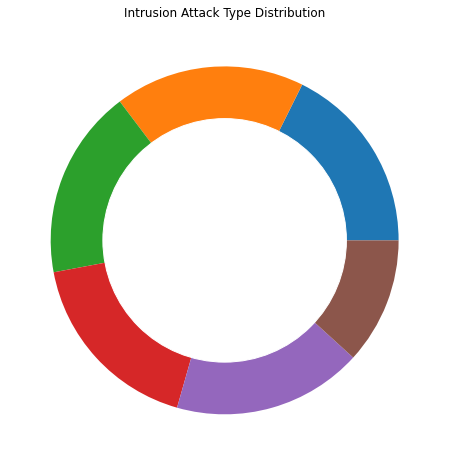

In [13]:
# viewing the distribution of intrusion attacks in our dataset 
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.title('Intrusion Attack Type Distribution')
plt.pie(train_dataset['Label'].value_counts())
p = plt.gcf()
p.gca().add_artist(circle)

## Making X & Y Variables 

In [13]:
test_dataset = train_dataset.sample(frac=0.1)
target_train = train_dataset['Label']
target_test = test_dataset['Label']
target_train.unique(), target_test.unique()

(array([ 0,  1,  4,  6,  8, 10]), array([ 6,  0,  8,  4, 10,  1]))

In [14]:
y_train = to_categorical(target_train, num_classes=11)
y_test = to_categorical(target_test, num_classes=11)

## Data Splicing
This stage involves the data split into train & test sets. The training data will be used for training our model, and the testing data will be used to check the performance of model on unseen dataset. We're using a split of **80-20**, i.e., **80%** data to be used for training & **20%** to be used for testing purpose.

In [50]:
# train_dataset = train_dataset.drop(columns = ["Timestamp", "Label"], axis=1)
# test_dataset = test_dataset.drop(columns = ["Timestamp", "Label"], axis=1)

In [16]:
train_dataset.shape

(220000, 78)

In [15]:
train_dataset = train_dataset.drop(columns = ["Timestamp", "Protocol","PSH Flag Cnt","Init Fwd Win Byts","Flow Byts/s","Flow Pkts/s", "Label"], axis=1)
test_dataset = test_dataset.drop(columns = ["Timestamp", "Protocol","PSH Flag Cnt","Init Fwd Win Byts","Flow Byts/s","Flow Pkts/s", "Label"], axis=1)

In [16]:
# X1_train = train_dataset.iloc[:, :]
# X1_test = test_dataset.iloc[:, :]

In [16]:
# making train & test splits
X_train = train_dataset.iloc[:, :].values
X_test = test_dataset.iloc[:, :].values
X_test

array([[8.000000e+01, 9.000741e+06, 2.000000e+00, ..., 0.000000e+00,
        9.000741e+06, 9.000741e+06],
       [5.959000e+04, 1.179000e+03, 5.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.100000e+01, 1.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [8.080000e+03, 5.130000e+02, 2.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [8.080000e+03, 1.117400e+04, 3.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [8.000000e+01, 2.617990e+05, 5.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [114]:
# test_X = test_dataset.iloc[:, :]
# df=pd.DataFrame(test_X)
# df.to_csv('test_X.csv',index = False)

In [115]:
# test_X1 = test_dataset.iloc[:30, :]
# df=pd.DataFrame(test_X1)
# df.to_csv('test_X1.csv',index = False)

In [18]:
# test_X1_values = test_dataset.iloc[:30, :].values
# df=pd.DataFrame(test_X1_values)
# df.to_csv('test_X1_values.csv',index = False)

In [21]:
# test_X2 = test_dataset.iloc[92]
# df=pd.DataFrame(test_X2)
# df.to_csv('test_X2.csv',index = False)

In [23]:
# list1=list(test_X2)
# print(list1)

[80.0, 1901423.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1901423.0, 0.0, 1901423.0, 1901423.0, 1901423.0, 1901423.0, 0.0, 1901423.0, 1901423.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 64.0, 0.0, 1.0518438033, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, -1.0, 0.0, 32.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [20]:
# test_X2_values = test_dataset.iloc[92].values
# df=pd.DataFrame(test_X2)
# df.to_csv('test_X2_values.csv',index = False)

In [24]:
# list2=list(test_X2_values)
# print(list2)

[80.0, 1901423.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1901423.0, 0.0, 1901423.0, 1901423.0, 1901423.0, 1901423.0, 0.0, 1901423.0, 1901423.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 64.0, 0.0, 1.0518438033, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, -1.0, 0.0, 32.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [21]:
X_train.shape

(120000, 73)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120000, 73)
(12000, 73)
(120000, 11)
(12000, 11)


In [17]:
#reshape
X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)
X_train.shape, X_test.shape

((170000, 73, 1), (17000, 73, 1))

Deep Neural Networks


In [29]:
def dmodel():
    model = Sequential()
    model.add(Flatten(input_shape=(73, 1)))

    model.add(Dense(12, activation='relu'))
    model.add(Dropout(0.01))
    model.add(Dense(14, activation='relu'))
    model.add(Dropout(0.01))
    model.add(Dense(12, activation='relu'))
    model.add(Dropout(0.01))
    # model.add(Dense(80, activation='relu'))
    # model.add(Dropout(0.01))
    # model.add(Dense(64, activation='relu'))
    # model.add(Dropout(0.01))
                     

    
    model.add(Dense(11, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [20]:
batch_size = 64

model_dnn4 = Sequential()
model_dnn4.add(Flatten(input_shape=(73, 1)))
model_dnn4.add(Dense(64,activation='relu'))  
model_dnn4.add(Dropout(0.01))
model_dnn4.add(Dense(64,activation='relu'))  
model_dnn4.add(Dropout(0.01))
model_dnn4.add(Dense(64,activation='relu'))  
model_dnn4.add(Dropout(0.01))
model_dnn4.add(Dense(64,activation='relu'))  
model_dnn4.add(Dropout(0.01))
model_dnn4.add(Dense(64,activation='relu'))  
model_dnn4.add(Dropout(0.01))
model_dnn4.add(Dense(11))
model_dnn4.add(Activation('softmax'))

In [21]:
model_dnn4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 73)                0         
                                                                 
 dense (Dense)               (None, 64)                4736      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [22]:
model_dnn4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.0001,patience=5) ## early stoppoing

model_dnn4.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size=batch_size, epochs=12, callbacks=[es])

Epoch 1/12
2657/2657 [==============================] - 17s 6ms/step - loss: 507.5883 - accuracy: 0.6544 - val_loss: 27.0541 - val_accuracy: 0.7648
Epoch 2/12
2657/2657 [==============================] - 15s 6ms/step - loss: 26.1165 - accuracy: 0.7576 - val_loss: 8.6092 - val_accuracy: 0.7824
Epoch 3/12
2657/2657 [==============================] - 16s 6ms/step - loss: 6.9860 - accuracy: 0.8238 - val_loss: 0.6438 - val_accuracy: 0.8569
Epoch 4/12
2657/2657 [==============================] - 11s 4ms/step - loss: 0.6372 - accuracy: 0.8087 - val_loss: 0.0648 - val_accuracy: 0.8278
Epoch 5/12
2657/2657 [==============================] - 9s 3ms/step - loss: 0.1608 - accuracy: 0.7986 - val_loss: 0.0639 - val_accuracy: 0.8142
Epoch 6/12
2657/2657 [==============================] - 8s 3ms/step - loss: 0.1674 - accuracy: 0.7667 - val_loss: 0.0728 - val_accuracy: 0.7944
Epoch 7/12
2657/2657 [==============================] - 8s 3ms/step - loss: 0.0795 - accuracy: 0.7935 - val_loss: 0.0724 - val_a

In [23]:
model_dnn4scores = model_dnn4.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model_dnn4.metrics_names[1], model_dnn4scores[1] * 100))

532/532 [==============================] - 1s 1ms/step - loss: 0.0766 - accuracy: 0.7752
accuracy: 77.52%


In [ ]:
model_dnn4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss',  min_delta=0.0001,patience=5) ## early stoppoing

hist_dnn4=model_dnn4.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size=batch_size, epochs=12, callbacks=[es])

In [30]:
d=dmodel()
d.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 73)                0         
                                                                 
 dense_1 (Dense)             (None, 12)                888       
                                                                 
 dropout_2 (Dropout)         (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 14)                182       
                                                                 
 dropout_3 (Dropout)         (None, 14)                0         
                                                                 
 dense_3 (Dense)             (None, 12)                180       
                                                                 
 dropout_4 (Dropout)         (None, 12)               

In [33]:
# logger = CSVLogger('logs.csv', append=True)
# d.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', min_delta=0.0001,patience=3) ## early stoppoing

d.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size=32, epochs=20, callbacks=[es])
# hisd = d.fit(X_train, y_train, epochs=12, batch_size=64, 
        #   validation_data=(X_test, y_test), callbacks=[logger])

Epoch 1/20
5313/5313 [==============================] - 9s 2ms/step - loss: 1.0570 - accuracy: 0.5247 - val_loss: 0.9972 - val_accuracy: 0.5288
Epoch 2/20
5313/5313 [==============================] - 10s 2ms/step - loss: 1.0866 - accuracy: 0.5232 - val_loss: 0.9954 - val_accuracy: 0.5313
Epoch 3/20
5313/5313 [==============================] - 10s 2ms/step - loss: 5.9309 - accuracy: 0.5228 - val_loss: 1.0050 - val_accuracy: 0.5295
Epoch 4/20
5313/5313 [==============================] - 10s 2ms/step - loss: 1.0261 - accuracy: 0.5233 - val_loss: 0.9958 - val_accuracy: 0.5319
Epoch 5/20
5313/5313 [==============================] - 10s 2ms/step - loss: 2.2547 - accuracy: 0.5233 - val_loss: 0.9960 - val_accuracy: 0.5219


In [34]:
dscores = d.evaluate(X_test, y_test)
print("%s: %.2f%%" % (d.metrics_names[1], dscores[1] * 100))

532/532 [==============================] - 1s 1ms/step - loss: 0.9960 - accuracy: 0.5219
accuracy: 52.19%


In [36]:
historyd = hist_dnn4.history
historyd.keys()

NameError: name 'hist_dnn4' is not defined

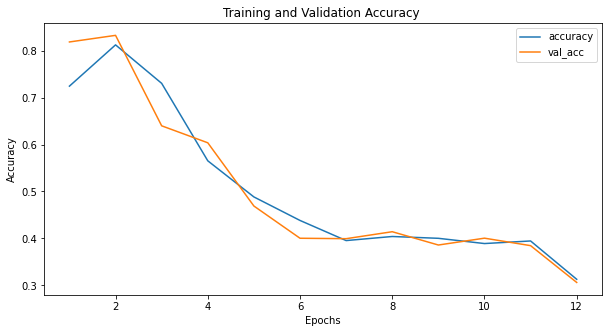

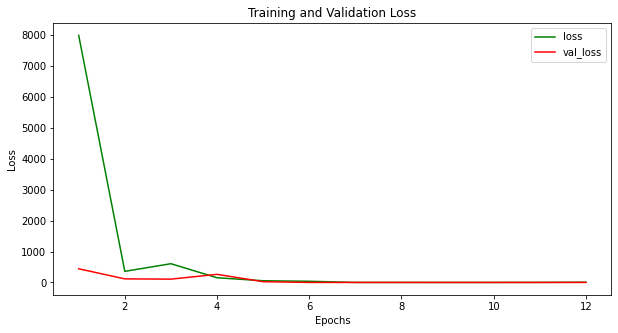

In [126]:
epochs = range(1, len(historyd['loss']) + 1)
acc = historyd['accuracy']
loss = historyd['loss']
val_acc = historyd['val_accuracy']
val_loss = historyd['val_loss']

# visualize training and val accuracy
plt.figure(figsize=(10, 5))
plt.title('Training and Validation Accuracy ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

# visualize train and val loss
plt.figure(figsize=(10, 5))
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()

LSTM

In [18]:
def LSTMmodel():
    model_lstm = Sequential()

    model_lstm.add(LSTM(8,input_shape=(73, 1), return_sequences=True))  
    model_lstm.add(Dropout(0.1))
    model_lstm.add(LSTM(8, return_sequences=False))  
    model_lstm.add(Dropout(0.1))
    model_lstm.add(Dense(11))
    model_lstm.add(Activation('softmax'))
    model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model_lstm

In [19]:
lstm=LSTMmodel()
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 73, 8)             320       
                                                                 
 dropout (Dropout)           (None, 73, 8)             0         
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 11)                99        
                                                                 
 activation (Activation)     (None, 11)                0         
                                                                 
Total params: 963
Trainable params: 963
Non-trainable pa

In [21]:
# lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss',  min_delta=0.0001,patience=3) ## early stoppoing

hist_lstm=lstm.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size=32, epochs=12, callbacks=[es])

Epoch 1/12
5313/5313 [==============================] - 259s 48ms/step - loss: 0.8831 - accuracy: 0.6340 - val_loss: 0.4483 - val_accuracy: 0.8340
Epoch 2/12
5313/5313 [==============================] - 228s 43ms/step - loss: 0.4083 - accuracy: 0.8310 - val_loss: 0.1813 - val_accuracy: 0.9423
Epoch 3/12
5313/5313 [==============================] - 240s 45ms/step - loss: 0.2853 - accuracy: 0.8957 - val_loss: 0.1318 - val_accuracy: 0.9475
Epoch 4/12
5313/5313 [==============================] - 237s 45ms/step - loss: 0.2015 - accuracy: 0.9311 - val_loss: 0.0931 - val_accuracy: 0.9761
Epoch 5/12
5313/5313 [==============================] - 231s 43ms/step - loss: 0.2670 - accuracy: 0.9045 - val_loss: 0.1250 - val_accuracy: 0.9760
Epoch 6/12
5313/5313 [==============================] - 233s 44ms/step - loss: 0.1847 - accuracy: 0.9375 - val_loss: 0.0588 - val_accuracy: 0.9915
Epoch 7/12
5313/5313 [==============================] - 297s 56ms/step - loss: 0.1371 - accuracy: 0.9542 - val_loss: 0

In [22]:
# logger1 = CSVLogger('logs1.csv', append=True)
# hislstm = lstm.fit(X_train, y_train, epochs=12, batch_size=64, 
#           validation_data=(X_test, y_test), callbacks=[logger1])

In [23]:
# logger1 = CSVLogger('logs1.csv', append=True)
# hislstm = lstm.fit(X1_train, y_train, epochs=12, batch_size=64, 
#           validation_data=(X1_test, y_test), callbacks=[logger1])

In [24]:
lstmscores = lstm.evaluate(X_test, y_test)
print("%s: %.2f%%" % (lstm.metrics_names[1], lstmscores[1] * 100))

532/532 [==============================] - 5s 10ms/step - loss: 0.0433 - accuracy: 0.9904
accuracy: 99.04%


In [25]:
# Save the model in h5 format 
lstm.save("lstm.h5")

In [111]:
# test=train_dataset.iloc[:,:]
# print(test)

        Dst Port  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
659775        53          79333             2             2               66   
402632        80            110             2             0                0   
102359       443      116638340            15            16              862   
631030        53          64384             1             1               47   
275444      3389        3944174            14             8             1440   
...          ...            ...           ...           ...              ...   
271353        22              6             1             1                0   
242983        22         382266            22            20             1928   
235329        22              7             1             1                0   
306115        22         295002            21            22             1928   
356236        22              7             1             1                0   

        TotLen Bwd Pkts  Fwd Pkt Len Ma

In [1]:
# train_dataset=train_dataset.drop(columns = [ "Protocol","PSH Flag Cnt","Init Fwd Win Byts","Flow Byts/s","Flow Pkts/s", ], axis=1)

test_input=train_dataset.iloc[:30]
# X_train = train_dataset.iloc[:, :-1].values
# test_input.drop(columns = ["Timestamp", "Protocol","PSH Flag Cnt","Init Fwd Win Byts","Flow Byts/s","Flow Pkts/s", "Label"], axis=1)
# print(test_input)
# test_input=list(test_input)
print(test_input)
print(len(test_input))

NameError: name 'train_dataset' is not defined

In [43]:
test_input.shape

(30, 73)

In [51]:
test_input=test_input.values.tolist()

In [52]:
type(test_input)

list

In [46]:
from keras.models import load_model
lstm = load_model('lstm.h5')

In [53]:
prediction = lstm.predict(test_input)
labels = np.argmax(prediction, axis=-1)    
print(labels)
# print(prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]


In [144]:

labels=label_encoder.inverse_transform(labels)
print(labels)

['DoS attacks-GoldenEye' 'DoS attacks-GoldenEye' 'Bot' 'Bot' 'Bot' 'Bot'
 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'DoS attacks-GoldenEye'
 'Bot' 'DoS attacks-GoldenEye' 'DoS attacks-GoldenEye'
 'DoS attacks-GoldenEye' 'DoS attacks-GoldenEye' 'Bot'
 'DoS attacks-GoldenEye' 'DoS attacks-GoldenEye' 'Bot' 'Bot' 'Bot' 'Bot'
 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'DoS attacks-GoldenEye' 'Bot'
 'DoS attacks-GoldenEye' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot'
 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot'
 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot'
 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot']


In [130]:
len(labels)

12000

C:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

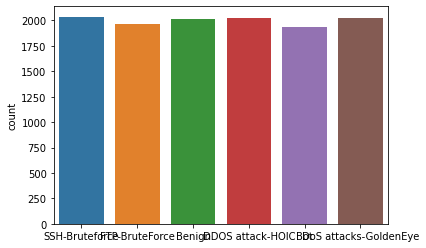

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(labels)
 

In [133]:
prediction = lstm.predict([[test_X2]])
labels = np.argmax(prediction, axis=-1)
labels=label_encoder.inverse_transform(labels)    
print(labels)

['DoS attacks-GoldenEye' 'DoS attacks-GoldenEye' 'Bot' 'Bot'
 'DoS attacks-GoldenEye' 'DoS attacks-GoldenEye' 'DoS attacks-GoldenEye'
 'Bot' 'DoS attacks-GoldenEye' 'DoS attacks-GoldenEye'
 'DoS attacks-GoldenEye' 'Bot' 'DoS attacks-GoldenEye'
 'DoS attacks-GoldenEye' 'DoS attacks-GoldenEye' 'DoS attacks-GoldenEye'
 'DoS attacks-GoldenEye' 'Bot' 'DoS attacks-GoldenEye'
 'DoS attacks-GoldenEye' 'DoS attacks-GoldenEye' 'DoS attacks-GoldenEye'
 'DoS attacks-GoldenEye' 'DoS attacks-GoldenEye' 'DoS attacks-GoldenEye'
 'DoS attacks-GoldenEye' 'DoS attacks-GoldenEye' 'DoS attacks-GoldenEye'
 'Bot' 'Bot' 'Bot' 'Bot' 'DoS attacks-GoldenEye' 'DoS attacks-GoldenEye'
 'DoS attacks-GoldenEye' 'DoS attacks-GoldenEye' 'Bot'
 'DoS attacks-GoldenEye' 'DoS attacks-GoldenEye' 'DoS attacks-GoldenEye'
 'DoS attacks-GoldenEye' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot'
 'DoS attacks-GoldenEye' 'DoS attacks-GoldenEye' 'DoS attacks-GoldenEye'
 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'Bot' 'DoS attacks-Golden

In [27]:
historylstm = hist_lstm.history
historylstm.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

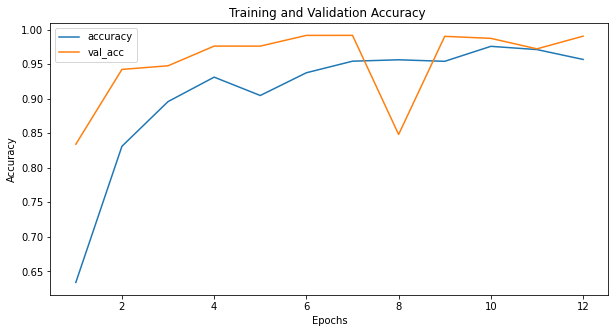

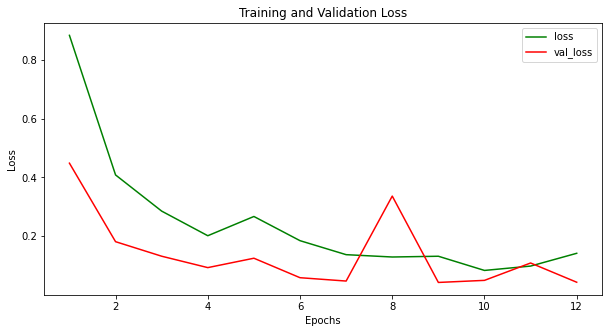

In [28]:
epochs = range(1, len(historylstm['loss']) + 1)
acc = historylstm['accuracy']
loss = historylstm['loss']
val_acc = historylstm['val_accuracy']
val_loss = historylstm['val_loss']

# visualize training and val accuracy
plt.figure(figsize=(10, 5))
plt.title('Training and Validation Accuracy ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

# visualize train and val loss
plt.figure(figsize=(10, 5))
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()

In [47]:
model_lstm = Sequential()
#model_dnn3.add(Flatten())
model_lstm.add(LSTM(8,input_shape=(73, 1), return_sequences=True))  
model_lstm.add(Dropout(0.1))
model_lstm.add(LSTM(8, return_sequences=True))  
model_lstm.add(Dropout(0.1))
model_lstm.add(Dense(11))
model_lstm.add(Activation('softmax'))

In [43]:
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 73, 8)             320       
                                                                 
 dropout_12 (Dropout)        (None, 73, 8)             0         
                                                                 
 lstm_3 (LSTM)               (None, 73, 8)             544       
                                                                 
 dropout_13 (Dropout)        (None, 73, 8)             0         
                                                                 
 dense_13 (Dense)            (None, 73, 11)            99        
                                                                 
 activation_3 (Activation)   (None, 73, 11)            0         
                                                                 
Total params: 963
Trainable params: 963
Non-trainable 

In [48]:
model_lstm.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.0001,patience=5) ## early stoppoing


model_lstm.fit(X_train, y_train, batch_size=64,  validation_data=(X_test, y_test),callbacks=[es],input_shape=(73, 1))
model_lstm.save("lstm_model_lstm.hdf5")

TypeError: fit() got an unexpected keyword argument 'input_shape'

CNN

In [24]:
# making the deep learning function
def model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(73, 1)))
    model.add(BatchNormalization())
    
    # adding a pooling layer
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(73, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(73, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(11, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [25]:
model = model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 73, 64)            448       
                                                                 
 batch_normalization (BatchN  (None, 73, 64)           256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 37, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 37, 64)            24640     
                                                                 
 batch_normalization_1 (Batc  (None, 37, 64)           256       
 hNormalization)                                                 
                                                      

In [26]:
logger = CSVLogger('logs.csv', append=True)
his = model.fit(X_train, y_train, epochs=7, batch_size=32, 
          validation_data=(X_test, y_test), callbacks=[logger])

Epoch 1/7
3750/3750 [==============================] - 55s 14ms/step - loss: 0.2187 - accuracy: 0.9137 - val_loss: 0.3759 - val_accuracy: 0.8399
Epoch 2/7
3750/3750 [==============================] - 56s 15ms/step - loss: 0.0479 - accuracy: 0.9862 - val_loss: 1.3965 - val_accuracy: 0.4599
Epoch 3/7
3750/3750 [==============================] - 56s 15ms/step - loss: 0.0387 - accuracy: 0.9895 - val_loss: 0.7869 - val_accuracy: 0.7822
Epoch 4/7
3750/3750 [==============================] - 56s 15ms/step - loss: 0.1040 - accuracy: 0.9639 - val_loss: 2.3714 - val_accuracy: 0.4554
Epoch 5/7
3750/3750 [==============================] - 63s 17ms/step - loss: 0.0833 - accuracy: 0.9738 - val_loss: 3.6727 - val_accuracy: 0.3043
Epoch 6/7
3750/3750 [==============================] - 55s 15ms/step - loss: 0.0737 - accuracy: 0.9774 - val_loss: 5.9943 - val_accuracy: 0.3087
Epoch 7/7
3750/3750 [==============================] - 48s 13ms/step - loss: 0.0651 - accuracy: 0.9810 - val_loss: 1.7967 - val_ac

## Visualization of Results (CNN)
Let's make a graphical visualization of results obtained by applying CNN to our data.

In [ ]:
# check the model performance on test data
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

188/188 [==============================] - 1s 3ms/step - loss: 0.1574 - accuracy: 0.9205
accuracy: 92.05%


In [2]:
# check history of model
history = his.history
history.keys()

NameError: name 'his' is not defined

In [1]:
epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

# visualize training and val accuracy
plt.figure(figsize=(10, 5))
plt.title('Training and Validation Accuracy (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

# visualize train and val loss
plt.figure(figsize=(10, 5))
plt.title('Training and Validation Loss(CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()

NameError: name 'history' is not defined